## Άσκηση 1η
Σκοπός της πρώτης σειράς ασκήσεων είναι, αφ’ ενός η εξοικείωση με το προγραμματιστικό περιβάλλον της Python, αφ’ ετέρου, η εισαγωγή στους τρόπους παράστασης και επεξεργασίας τηλεπικοινωνιακών σημάτων στη συγκεκριμένη γλώσσα προγραμματισμού.

### Μέρος 1: Εξοικείωση με το προγραμματιστικό περιβάλλον της Python
... (Λίγα λόγια για τον interactive python interpreter [ipython] και το jupyter notebook)

#### Jupyter notebook
... 

#### Εξάσκηση

In [105]:
from scipy import signal
# Ανατρέξτε στην τεκμηρίωση της βιβλιοθήκης scipy.signal
# https://docs.scipy.org/doc/scipy/reference/signal.html
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
# Δείτε την έκδοση της αριθμητικής βιβλιοθήκης numpy
np.__version__

'1.15.1'

In [106]:
import warnings
warnings.filterwarnings('ignore')

Μην ξεχνάτε ότι η IPython μας δίνει τη δυνατότητα να 'εξερευνήσουμε' το περιεχόμενο ενός package, χρησιμοποιώντας τη δυνατότητα του tab-completion, ή τη χρήση του ? για help/documentation: 
Π.χ., για να δούμε όλα τα περιεχόμενα του signal namespace δίνουμε:

In [3]: signal.<TAB>
    
και για να καλέσουμε την ενσωμετωμένη τεκμηρίωση της numpy, δίνουμε:

In [4]: np?

Περισσότερες πληροφορίες μπορείτε να πάρετε από το http://www.numpy.org.

In [107]:
# Δημιουργήστε ένα μονοδιάστατο μέγεθος

s=2
print('s=',s)

s= 2


In [108]:
# Δημιουργείστε ένα διάνυσμα πραγματικών τιμών:

v=np.array([1,5,9])
print('v=',v)

v= [1 5 9]


In [109]:
# Δημιουργείστε έναν πίνακα πραγματικών τιμών:

a=np.array([[1,2,3],[4,5,6],[7,8,9]])
print('a=',a)

a= [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [110]:
# Αθροίστε

a+5

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [111]:
#Πολλαπλασιάστε

b=s*v*2
print('b=',b)

b= [ 4 20 36]


In [112]:
# Πολλαπλασιάστε στοιχείο-προς-στοιχείο (elementwise)

np.multiply(v,b)

array([  4, 100, 324])

In [113]:
#Ελέγξτε το μήκος ενός διανύσματος

len(v)

3

In [114]:
# Ελέγξτε το μέγεθος ενός πίνακα

a.shape

(3, 3)

In [115]:
# Προσπελάστε συγκεκριμένα στοιχεία ενός πίνακα
# Η δεικτοδότηση αρχίζει από το 0. 

a[0,1]

2

In [116]:
# Προσπελάστε συγκεκριμένα στοιχεία ενός πίνακα (συνέχεια)
# Αρνητικές τιμές μετρούν από το τέλος, π.χ. το -1 
# αναφέρεται στο τελευταίο στοιχείο)

a[1,-1]

6

In [117]:
# Προσπελάστε συγκεκριμέν0 τμήμα ενός διανύσματος

v[1:3]

# Προσοχή: τα στοιχεία [2ο,3ο] δίνονται ως 1:3 και όχι ως 1:2
# Δοκιμάστε το v[1:2]...

array([5, 9])

In [118]:
# Προσπελάστε συγκεκριμένα τμήματα ενός πίνακα

a[0:2,:]

# Ομοίως: οι γραμμές 1 & 2 δίνονται ως 0:2 και όχι ως 0:1

array([[1, 2, 3],
       [4, 5, 6]])

In [119]:
# Δημιουργήστε ένα διάνυσμα με στοιχεία από το 0 έως το 0.5 και βήμα 0.1

t=np.arange(0,0.5,0.1)
print('t=',t)

t= [0.  0.1 0.2 0.3 0.4]



### Μέρος 2:  Δειγματοληψία - Ψηφιοποίηση

Τα πρωτογενή σήματα είναι κυρίως αναλογικά (συνεχούς χρόνου). Για να τα παραστήσουμε και επεξεργαστούμε στον υπολογιστή μας (ή άλλη ψηφιακή μηχανή) θα πρέπει πρώτα να τα ψηφιοποιήσουμε. Υποθέστε ένα σήμα συνεχούς χρόνου $x(t)$ με μετασχηματισμό Fourier (Continuous Time Fourier Transform – CTFT):
 $$X(f)=\int_{-\infty}^{\infty} x(t)e^{-j2\pi ft} dt$$


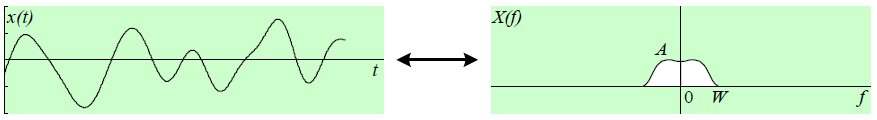


Λαμβάνοντας δείγματα του $x(t)$ με ρυθμό $f_s=1/T_s$ παράγεται σήμα διακριτού χρόνου $x(nT_s)$. Μαθηματικά το αναπαριστάνουμε ως σειρά συναρτήσεων δέλτα
$$x_\delta (t)=\sum_{n=-\infty}^{\infty}x(nT_s)\delta(t-nT_s)=x(t)\sum_{n=-\infty}^{\infty}\delta(t-nT_s)$$
με μετασχηματισμό Fourier
$$X_\delta (f)=\sum_{n=-\infty}^{\infty}x(nT_s)e^{-j2\pi fnT_s}=X(f)*1/T_s\sum_{n=-\infty}^{\infty}\delta(f-k/T_s)=1/T_s\sum_{n=-\infty}^{\infty}X(f-k/T_s)$$
που είναι περιοδική συνάρτηση.

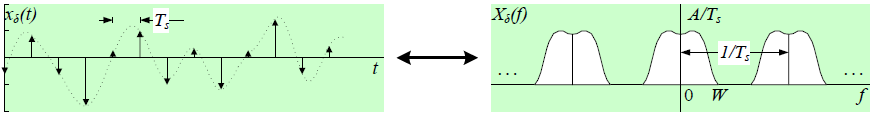

Για βαθυπερατά σήματα $x(t)$ εύρους ζώνης W, με την υπόθεση ότι ο ρυθμός δειγματοληψίας $fs ≥
2W$, ισχύει ότι $X(f) = T_s X_\delta(f)$, $0 ≤ f ≤ W$, δηλαδή, το σήμα $X(f)$ προκύπτει μετά από διάβαση του
δειγματοληπτημένου $x_\delta(t)$ μέσω ιδανικού βαθυπερατού φίλτρου κέρδους $T_s$. Από το προηγούμενο
σχήμα γίνεται φανερό ότι εάν η δειγματοληψία γίνει με συχνότητα μικρότερη του διπλασίου της
ανώτερης συχνότητας $W$ του σήματος (υποδειγμάτιση – undersampling), τότε εμφανίζονται στην
περιοχή συχνοτήτων του σήματος «είδωλα» φάσματος από ανώτερες συχνότητες που δεν
επιτρέπουν την ακριβή αποκατάσταση του αρχικού σήματος συνεχούς χρόνου. Το φαινόμενο αυτό
ονομάζεται __αναδίπλωση__ ή __επικάλυψη__ (aliasing), το δε σφάλμα κατά την αποκατάσταση του
αρχικού σήματος αποκαλείται σφάλμα αναδίπλωσης (aliasing error).
Η δειγματοληψία στο πεδίο του χρόνου αποτελεί τη βάση για τον ορισμό του μετασχηματισμού
Fourier διακριτού χρόνου (Discrete Time Fourier Transform – DTFT). Για μια σειρά διακριτών
αριθμών $x[n]$, ο μετασχηματισμός Fourier διακριτού χρόνου ορίζεται ως:

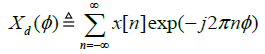

O DTFT είναι περιοδική συνάρτηση με περίοδο $1$, επομένως, αρκεί ο υπολογισμός του στο
διάστημα συχνοτήτων $[0,1]$ ή ισοδύναμα $[-½,½]$. Να σημειωθεί ότι ο DTFT, παρότι προκύπτει από
μια σειρά διακριτών αριθμών $x[n]$, είναι συνεχής συνάρτηση της μεταβλητής $\phi$ όπως παραστατικά
φαίνεται στο επόμενο σχήμα.

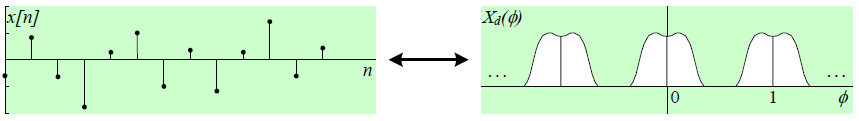

Με τη σειρά των διακριτών αριθμών να προκύπτει ως αποτέλεσμα δειγματοληψίας, $x[n]=x(nT_s)$, ο
DTFT και ο μετασχηματισμός Fourier $X_\delta(f)$ του δειγματοληπτημένου σήματος συνδέονται μέσω
της αντιστοιχίας $\phi ↔ f/f_s$. Η συνήθης πρακτική είναι να παριστάνουμε τον λόγο $f/f_s$ ως
κανονικοποιημένη συχνότητα $\phi$ ($f_D$, στις σημειώσεις σας) και οι πραγματικές συχνότητες να
προκύπτουν ως πολλαπλάσιά της (συνήθως κλασματικά). Για τη σύνδεση του DTFT με τον μετασχηματισμό Fourier $X(f)$ του σήματος πρέπει επιπλέον να γίνει αναγωγή στην περίοδο δειγματοληψίας με πολλαπλασιασμό επί $T_s$ (ή διαίρεση με $f_s$).
Κατ΄ αναλογία με τη δειγματοληψία σημάτων στο χρόνο μπορούμε να κάνουμε δειγματοληψία στο
πεδίο της συχνότητας λαμβάνοντας διακριτές τιμές $X(kf_o)$ του μετασχηματισμού Fourier που
αντιστοιχούν σε ανάλυση συχνότητας $f_o=1/T_o$. Αυτό ισοδυναμεί με περιοδική επανάληψη του
σήματος συνεχούς χρόνου $x(t)$ κάθε $Τ_ο$, αφού το περιοδικό σήμα

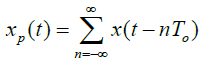

έχει μετασχηματισμό Fourier

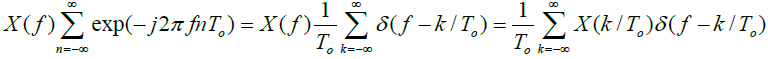

Επομένως, $X[k] = X(kf_o)/Τ_o$ είναι οι συντελεστές του αναπτύγματος σε σειρά Fourier.του περιοδικού
σήματος $x_p(t)$. Προφανώς, για σήματα $x(t)$ πεπερασμένης διάρκειας, όπου $x(t)=0$ για $|t| ≥ T$, με την
υπόθεση ότι η περίοδος $T_o ≥ 2T$, ισχύει ότι $x(t) = x_p(t)$ για $|t| ≤ T$.
Στην πράξη, τα σήματα έχουν πολύ μεγάλη διάρκεια για να μπορέσουμε να τα αναλύσουμε στην
ολότητά τους. Έτσι εφαρμόζουμε ένα ορθογωνικό χρονικό παράθυρο, ώστε να διατηρήσουμε μόνο
το πιο σημαντικό τους μέρος για το διάστημα παρατήρησης και $x(t)= 0$, αλλού. Κατά τον
υπολογισμό του DTFT $X_d(\phi)$ ενός τέτοιου ακρωτηριασμένου σήματος, αντί του απείρου
αθροίσματος, περιοριζόμαστε σε μια πεπερασμένου μήκους $L$ σειρά αριθμών $x[n]$, οπότε

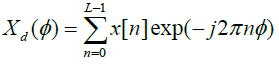

H δειγματοληψία του $X_d(\phi)$ στο πεδίο συχνότητας σε $Ν$ ισαπέχουσες κανονικοποιημένες συχνότητες $0$, $1/Ν$, $2/Ν$, $…$, $(Ν-1)/Ν$, δίνει

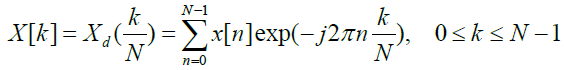

όπου, εάν $N≥L$, θέτουμε $x[n]=0$ για $n≥L$. Η τελευταία σχέση αναγνωρίζεται ως ο διακριτός μετασχηματισμός Fourier (Discrete Fourier Transform – DFT), ο οποίος για μια πεπερασμένη σειρά $xn$, $n=0$, $1$, $…$, $N-1$, ορίζεται ως:

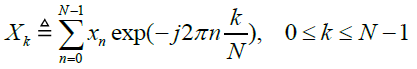

και ο αντίστροφός του είναι

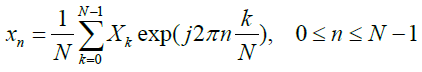

Η $X_d(\phi)$ ως DTFT είναι περιοδική συνάρτηση και εάν η αρχική σειρά xn ήταν περιοδική (και δεν
εφαρμόζαμε το παράθυρο), τότε η $X_d(\phi)$ θα ήταν μηδέν παντού εκτός των σημείων της
δειγματοληψίας $k/Ν$. Δηλαδή, εάν θεωρήσουμε μια πεπερασμένου μήκους σειρά αριθμών που
επαναλαμβάνεται περιοδικά, o διακριτού χρόνου μετασχηματισμός Fourier της (DTFT) είναι και
αυτός περιοδικός και διακριτός. Επιπλέον, ο DFT και ο αντίστροφός του IDFT, εάν δεν
περιορίζαμε τους δείκτες $n$ και $k$ μεταξύ $0$ και $N-1$, θα ήταν περιοδικές συναρτήσεις. Άρα η
πεπερασμένη σειρά xn μπορεί να θεωρηθεί ως ένα περιοδικό σήμα διακριτού χρόνου ιδωμένο μόνο
κατά τη διάρκεια μιας περιόδου και ο DFT, η σειρά $X_k$, ως τα δείγματα με ανάλυση $1/Ν$ του DTFT
$X_d(\phi)$ στο πεδίο κανονικοποιημένων συχνοτήτων $[0,1]$, όπως φαίνεται στο επόμενο σχήμα.

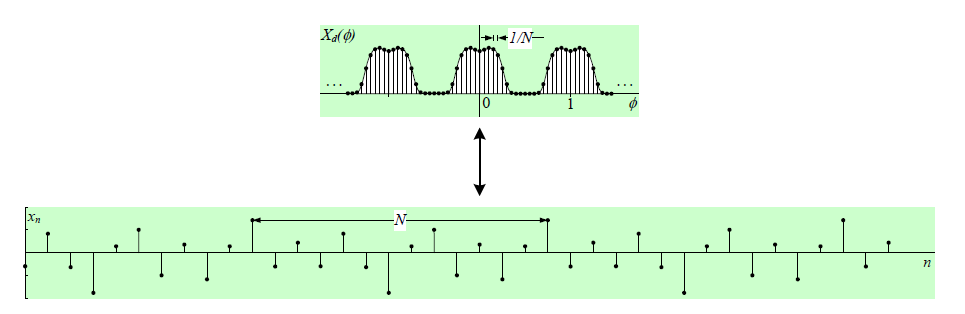

#### Φασματική Ανάλυση
Για τον υπολογισμό της ενέργειας ή ισχύος της κυματομορφής $x(t)$, ανάλογα με την περίπτωση
σήματος, ισχύει

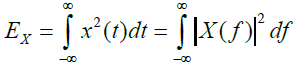

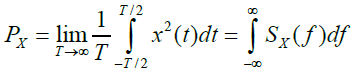

όπου για σήματα ισχύος $S_Χ(f)$ είναι η πυκνότητα φάσματος ισχύος (Power Spectral Density – PSD)
της $x(t)$. Για σήματα διακριτού χρόνου που προκύπτουν από δειγματοληψία της $x(t)$ με περίοδο $T_s$,
οι αντίστοιχες σχέσεις υπολογισμό της ενέργειας ή ισχύος γίνονται

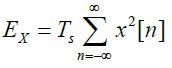

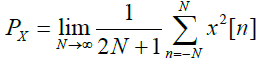

Ένας απλός τρόπος να εκτιμηθεί η πυκνότητα φάσματος ισχύος της κυματομορφής $x(t)$ είναι να
ληφθεί ο DTFT των δειγμάτων του σήματος και μετά να υψωθεί στο τετράγωνο το μέτρο του
αποτελέσματος. Αυτός ο εκτιμητής αποκαλείται περιοδόγραμμα (periodogram). Το περιοδόγραμμα
ενός πεπερασμένου μήκους $L$ σήματος $x[n]$ ορίζεται ως

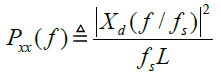

όπου $X_d(\phi)$ o DTFT του σήματος. Με το μήκος $L$ να τείνει στο άπειρο, το περιοδόγραμμα $P_{xx}(f)$
τείνει στην πυκνότητα φάσματος ισχύος $S_Χ(f)$. Ο υπολογισμός του περιοδογράμματος σε
πεπερασμένο πλήθος συχνοτήτων $kf_s/Ν$, $k=0$, $1$, $…$ , $Ν$ δίνει

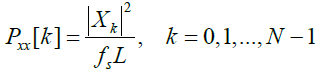

όπου $X_k$ και ο DFT της πεπερασμένου μήκους $L$ σειράς δειγμάτων του σήματος. Η ισχύς του
σήματος είναι τότε

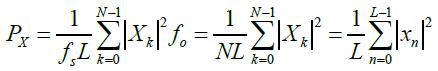

όπου η τελευταία ισότητα προκύπτει από το θεώρημα Parseval, που για την περίπτωση του DFT
εκφράζεται ως:

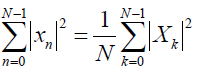

Στην ειδική περίπτωση περιοδικών σημάτων έχουμε

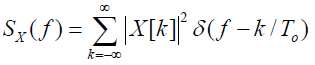

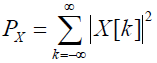

όπου $X[k]$ οι συντελεστές του αναπτύγματος σε σειρά Fourier και $T_o$ η περίοδος του σήματος.

### Μέρος 3:  Εφαρμογή Α

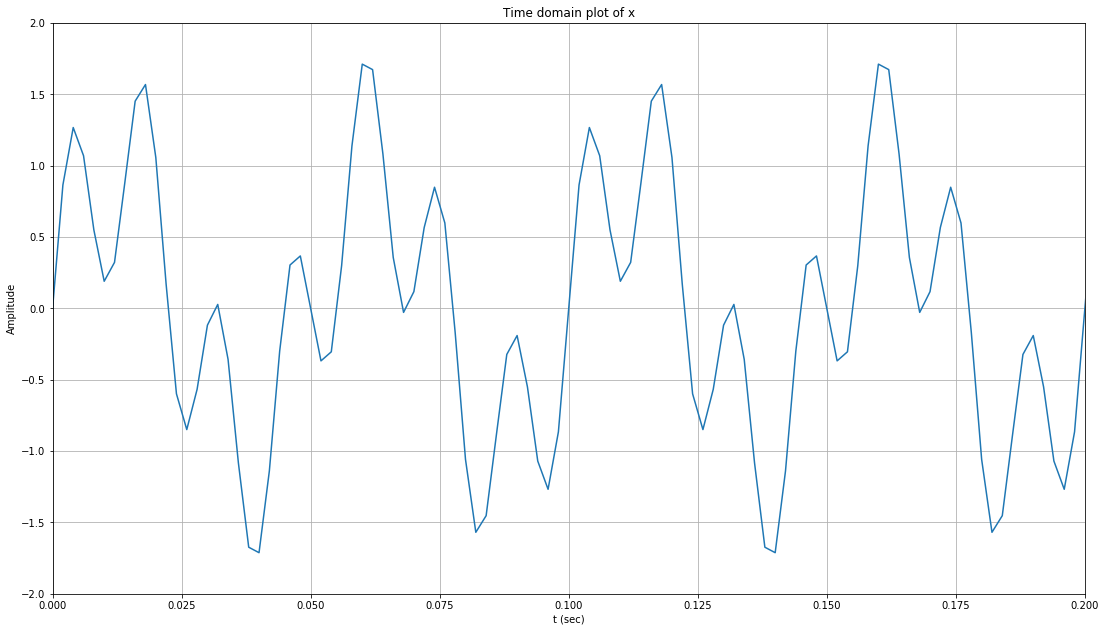

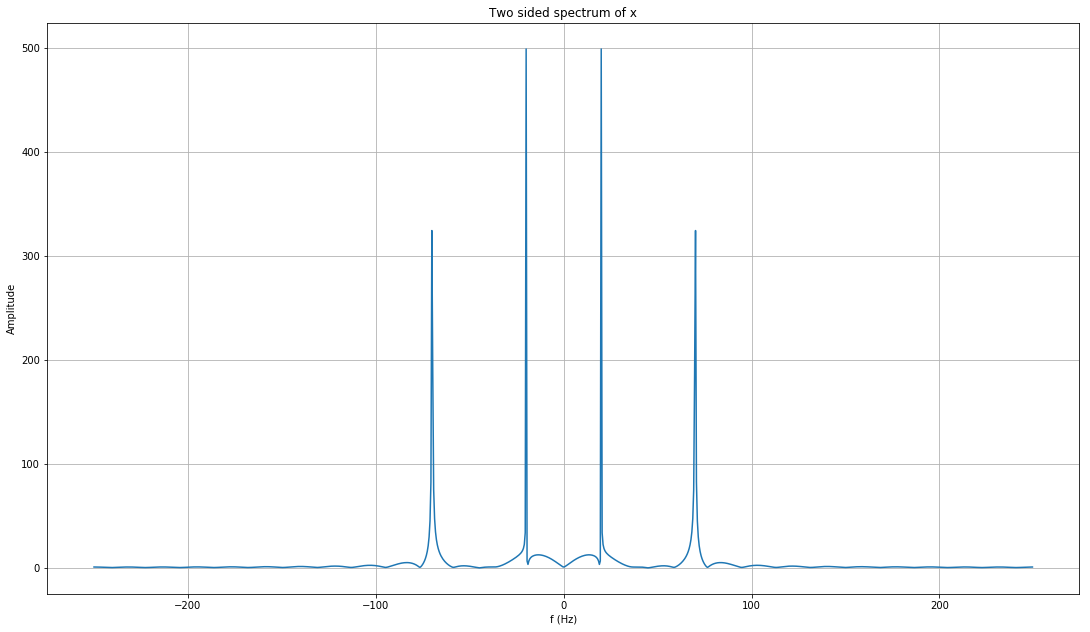

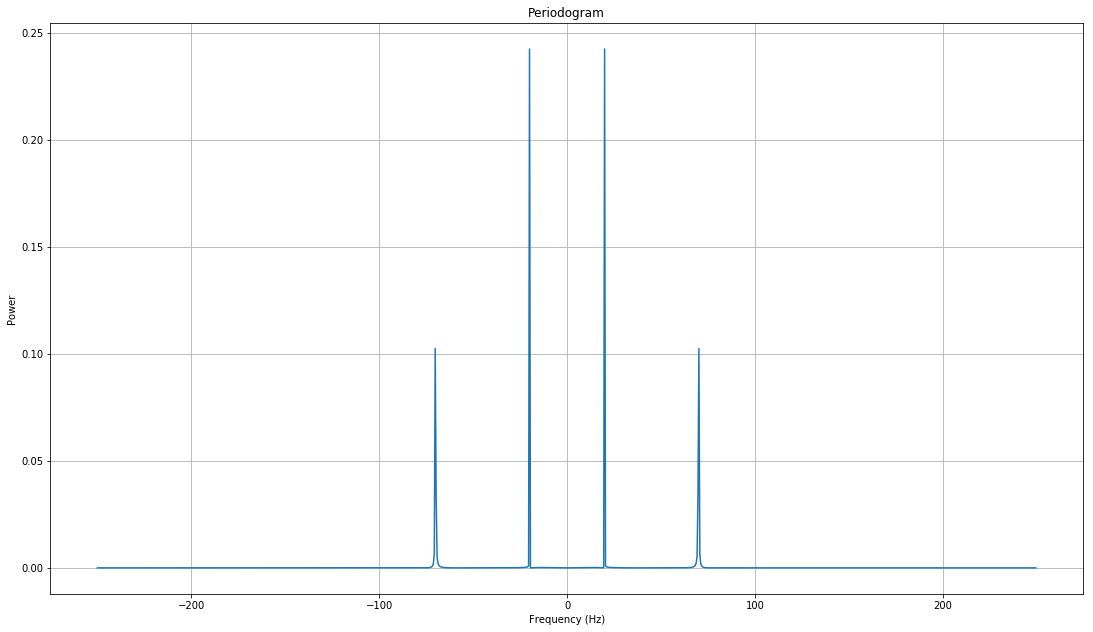

In [120]:
# Part 1 Δημιουργήστε το σήμα

Fs=500                     # συχνότητα δειγματοληψίας 500 Hz
Ts=1/Fs                    # περίοδος δειγματοληψίας
L=1000                     # μήκος σήματος (αριθμός δειγμάτων)
T=L*Ts                     # διάρκεια σήματος
t=np.arange(0,(L-1)*Ts,Ts) # χρονικές στιγμές υπολογισμού του σήματος
        
x=np.sin(2*np.pi*20*t)+ 0.8*np.sin(2*np.pi*70*(t-2)) # ημιτονικό σήμα συχνότητας 20 Hz, συνιστώσα 70 Hz

# Σχεδιάστε το σήμα στο πεδίο του χρόνου

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(t,x)
ax.set(xlabel='t (sec)', ylabel='Amplitude',
       title='Time domain plot of x')
ax.grid()
ax.axis([0, 0.2, -2, 2])
plt.show()

# Υπολογίστε τον διακριτό μετασχηματισμό Fourier

def nextpow2(i):
    n = 1
    while n < i: n *= 2
    return n

N = 2^nextpow2(L)         # μήκος μετασχηματισμού Fourier.
                          # η nextpow2 βρίσκει τον εκθέτη της δύναμης του 2 που
                          # είναι μεγαλύτερη ή ίση από το όρισμα L
Fo=Fs/N                   # ανάλυση συχνότητας
f=np.arange(0,N)*Fo       # διάνυσμα συχνοτήτων
X=np.fft.fft(x,N)         # αριθμητικός υπολογισμός του διακριτού μετασχηματισμού Fourier (DFT) για Ν σημεία

# Σχεδιάστε το σήμα στο πεδίο συχνότητας

# Αφού το σήμα είναι πραγματικό μπορείτε να σχεδιάσετε μόνο τις θετικές συχνότητες
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f[np.arange(1,N)],abs(X[np.arange(1,N)]))
ax.set(xlabel='f (Hz)', ylabel='Amplitude',
       title='Frequency domain plot of x')
ax.grid()
plt.show()

f=f-Fs/2                           # ολίσθηση συχνοτήτων προς τα αριστερά κατά –Fs/2
X=np.fft.fftshift(X)               # ολίσθηση της μηδενικής συχνότητας στο κέντρο του φάσματος
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f,abs(X))
ax.set(xlabel='f (Hz)', ylabel='Amplitude',
       title='Two sided spectrum of x')
ax.grid()
plt.show()

# Υπολογίστε την ισχύ

power=np.multiply(X,np.conj(X))/N/L    # υπολογισμός πυκνότητας ισχύος
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f,power)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='Periodogram')
ax.grid()
plt.show()

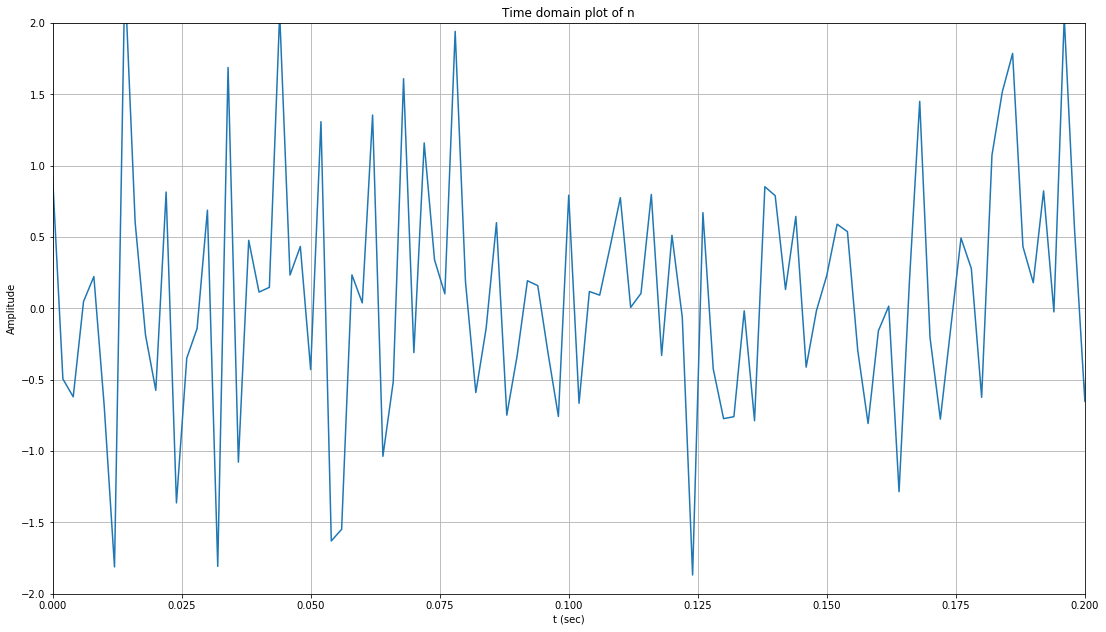

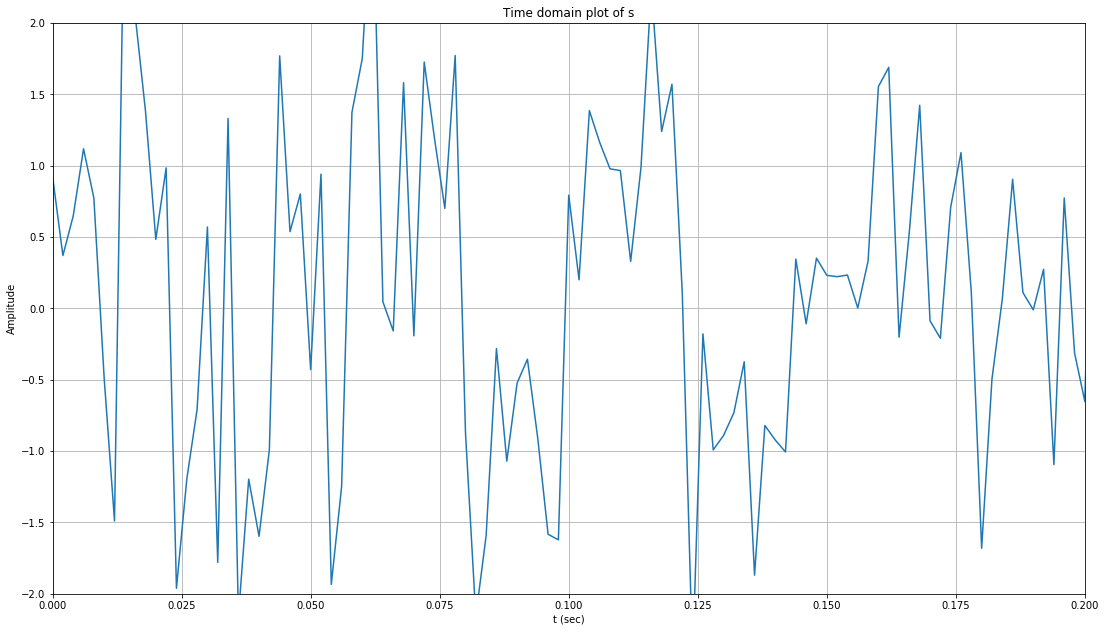

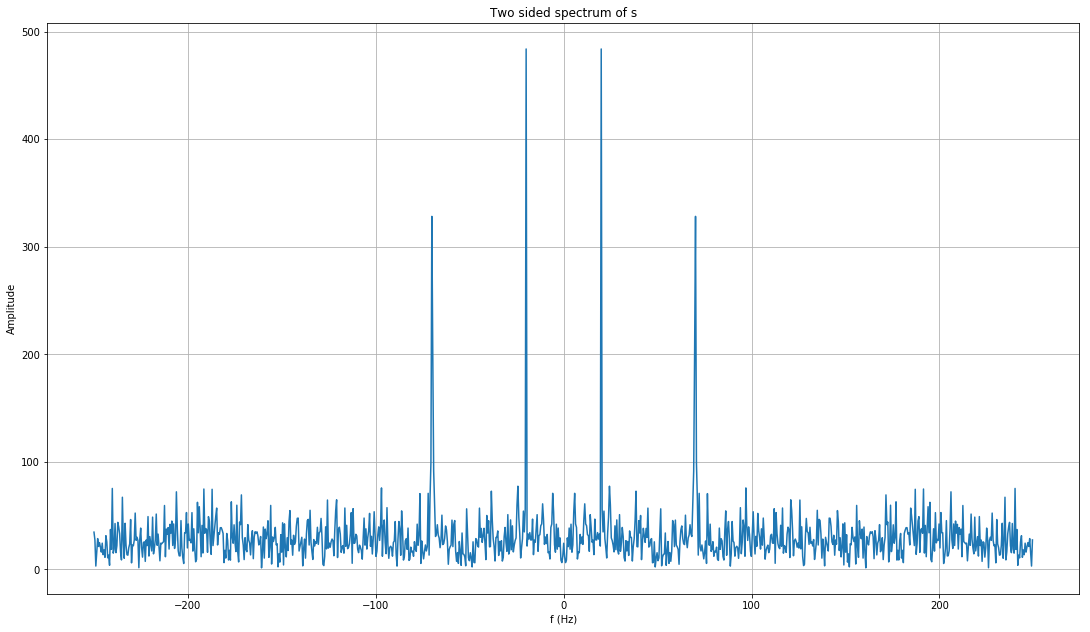

In [121]:
# Part 2 Προσθέστε θόρυβο στο σήμα

# Συμπληρώστε τον κώδικα για τη δημιουργία του σήματος θορύβου n με τη βοήθεια της συνάρτησης randn.
# Το διάνυσμα θορύβου n θα πρέπει να είναι του ίδιου μεγέθους με αυτό της ημιτονοειδούς κυματομορφής x του πρώτου μέρους.
# Σχεδιάστε το σήμα θορύβου στο διάστημα από 0 έως 0.2 sec και κλίμακα σε από -2 έως 2.
# Υπολογίστε το περιοδόγραμμα του n και σχεδιάστε την πυκνότητα φάσματος ισχύος του σήματος θορύβου.
# Προσθέστε το σήμα θορύβου και το x για να λάβετε το σήμα με θόρυβο s.
# Σχεδιάσατε το σήμα με θόρυβο s στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec 
# και κλίμακα από -2 έως 2 καθώς και το αμφίπλευρο φάσμα του.

rand_n = random.randn(np.size(x))
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(t,rand_n)
ax.set(xlabel='t (sec)', ylabel='Amplitude',
       title='Time domain plot of n')
ax.axis([0, 0.2, -2, 2])
ax.grid()
plt.show()

N = 2^nextpow2(L)
Fo=Fs/N           
f=(np.arange(0,N))*Fo     
rand_N=np.fft.fft(rand_n,N)   
          
f=f-Fs/2
rand_N=np.fft.fftshift(rand_N)     

power_n=np.multiply(rand_N,np.conj(rand_N))/N/L
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f,power_n)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='Periodogram of n')
ax.grid()
plt.show()

s = x + rand_n

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(t,s)
ax.set(xlabel='t (sec)', ylabel='Amplitude',
       title='Time domain plot of s')
ax.axis([0, 0.2, -2, 2])
ax.grid()
plt.show()                  

N = 2^nextpow2(L)  
                   
Fo=Fs/N           
f=(np.arange(0,N))*Fo      
S=np.fft.fft(s,N)       
                             
f=f-Fs/2       
S=np.fft.fftshift(S)    
                  
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f,abs(S))
ax.set(xlabel='f (Hz)', ylabel='Amplitude',
       title='Two sided spectrum of s')
ax.grid()
plt.show()

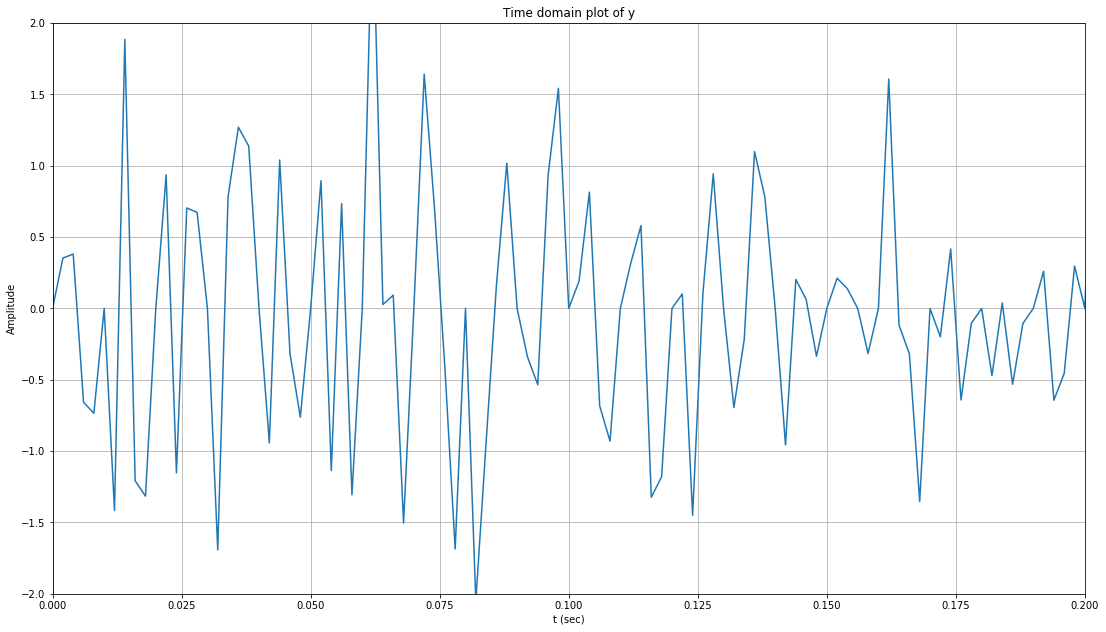

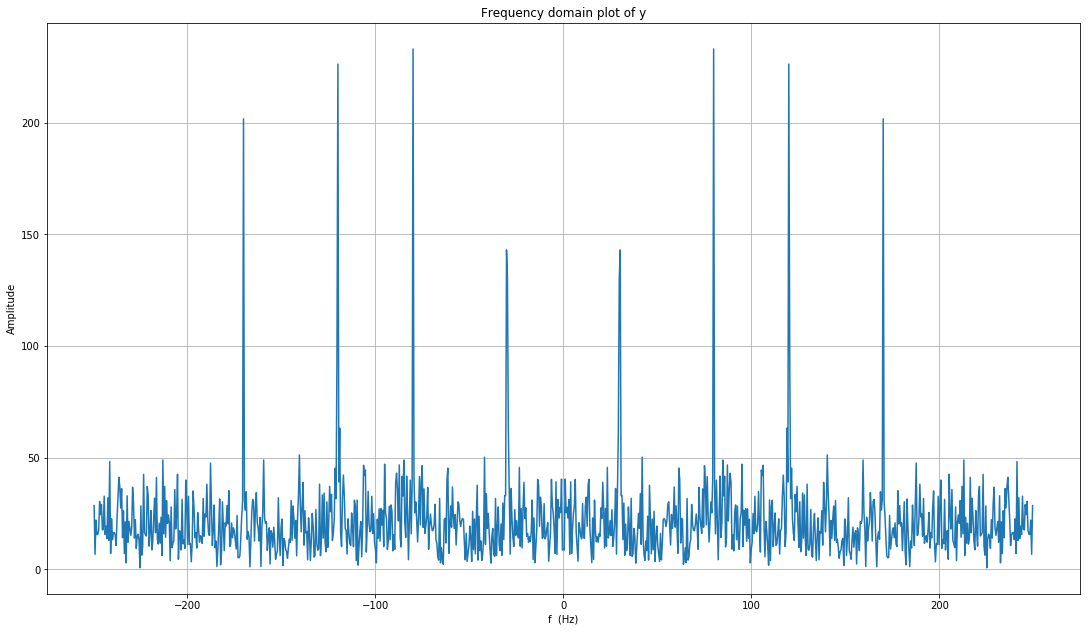

In [122]:
# Part 3. Πολλαπλασιασμός σημάτων

# Συμπληρώστε τον κώδικα δημιουργίας ενός ημιτονοειδούς σήματος συχνότητας
# 100 Hz και πολλαπλασιάστε με το προηγούμενο σήμα s.
# Τα δύο σήματα θα πρέπει να είναι του ίδιου μεγέθους.
# Σχεδιάστε το αποτέλεσμα στο πεδίο του χρόνου στην περιοχή 0 έως 0.2 sec
# και κλίμακα από -2 έως 2 καθώς και στο πεδίο της συχνότητας
# χρησιμοποιώντας τη συνάρτηση fftshift.

z=np.sin(2*np.pi*100*t)
y= np.multiply(z,s)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(t,y)
ax.set(xlabel='t (sec)', ylabel='Amplitude',
       title='Time domain plot of y')
ax.axis([0, 0.2, -2, 2])
ax.grid()
plt.show()
           
N = 2^nextpow2(L)
             
Fo=Fs/N           
f=(np.arange(0,N))*Fo      
Y=np.fft.fft(y,N)
                                        
f=f-Fs/2          
Y=np.fft.fftshift(Y)     

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f[np.arange(1,N)],abs(Y[np.arange(1,N)]))
ax.set(xlabel='f  (Hz)', ylabel='Amplitude',
       title='Frequency domain plot of y')
ax.grid()
plt.show()

### Μέρος 4:  Εφαρμογή Β

Να γραφεί σε Python συνάρτηση φασματικής ανάλυσης, παρόμοια με την `signal.welch()`: θα δέχεται ως είσοδο διάνυσμα πραγματικού σήματος καθώς και τη συχνότητα δειγματοληψίας, $F_s$, και θα σχεδιάζει τη μονόπλευρη φασματική πυκνότητα του σήματος στην περιοχή $[0-F_s/2)$. Το σήμα θα τεμαχίζεται σε τμήματα μήκους ίσου με τη δύναμη του $2$ την πλησιέστερη στο $1/8$ του συνολικού του μήκους, αλλά όχι μικρότερου από 256. Τα τμήματα θα είναι επικαλυπτόμενα κατά $50\%$. Το τελευταίο τμήμα, εάν υπολείπεται σε μήκος των άλλων, θα αγνοείται. Θα υπολογίζεται με FFT το φάσμα κάθε τμήματος και θα λαμβάνεται η μέση τιμή όλων των τμημάτων. Η συνάρτηση να δοκιμαστεί με το σήμα του παραδείγματος 1.1 και να συγκριθεί το αποτέλεσμα με το αντίστοιχο της `signal.welch()`.

In [123]:
def pwelch(x,Fs):                    
    Ts=1/Fs                    
    L=np.size(x)+1                 
    T=L*Ts                     
    N = 2^nextpow2(L)
    Fo=Fs/N                   
    f=np.arange(0,N)*Fo       
     
    window_size = nextpow2(np.size(x)/8)
    if (window_size<256):
        window_size=256
    windows = np.size(x)//(window_size//2)-1
    indexer = np.arange(window_size)[None, :] + (window_size//2)*np.arange(windows)[:, None]
    windowed_x = x[indexer]

    avg_pwr=0
    for window in windowed_x:
        window = window * np.hanning(np.size(window))
        L=np.size(window)+1                 
        T=L*Ts                     
        N = 2^nextpow2(L)
        Fo=Fs/N                   
        f=np.arange(0,N)*Fo
        window_fft=np.fft.fft(window,N)
        power=np.multiply(window_fft,np.conj(window_fft))/N/L
        avg_pwr=avg_pwr+power
    avg_pwr=avg_pwr/windows

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(f[np.arange(0,N//2)],avg_pwr[np.arange(0,N//2)])
    ax.set(xlabel='Frequency (Hz)', ylabel='Power',
           title='Periodogram pwelch()')
    ax.grid()
    plt.show()
    
    return f[np.arange(0,N//2)], avg_pwr[np.arange(0,N//2)]

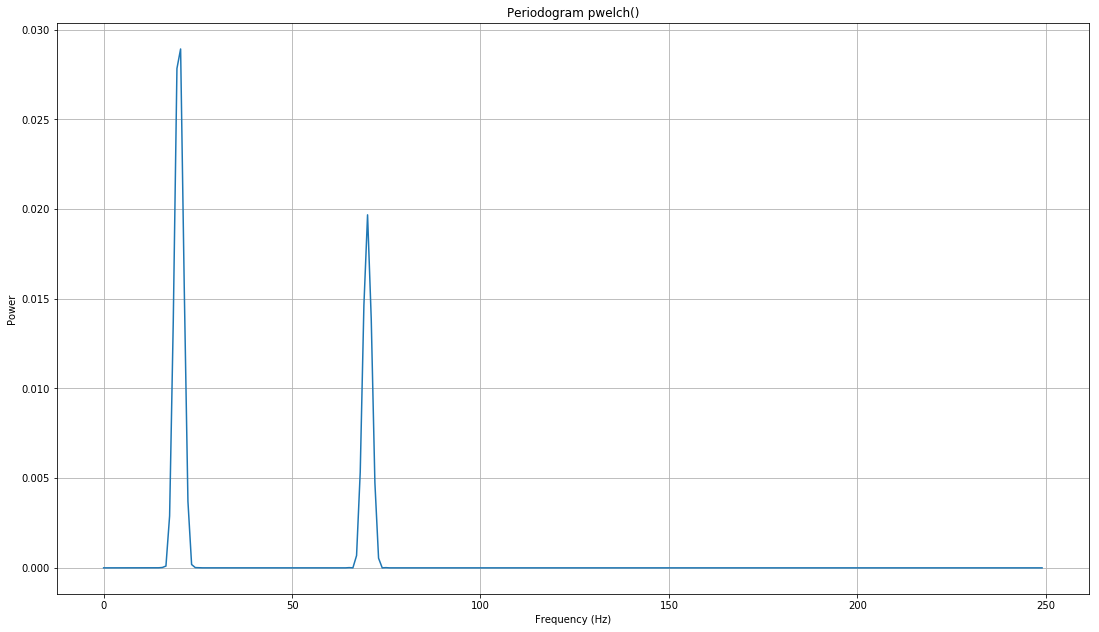

In [124]:
Fs=500
f1,Pxx1 = pwelch(x,Fs)
f2,Pxx2 = signal.welch(x,fs=Fs)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.plot(f2,Pxx2)
ax.set(xlabel='Frequency (Hz)', ylabel='Power',
       title='Periodogram signal.welch()')
ax.grid()
plt.show()